In [1]:
import pandas as pd
import numpy as np
from os import path
from CSVUtils import *
import ta
import matplotlib.pyplot as plt
import seaborn as sn
import calendar
from pprint import pprint

In [27]:
DIR = "./input/yahoo"
nameList = ["^GSPC", "^GDAXI", "^HSI"]
df_list = []
startDate = pd.to_datetime("2015-01-01")
endDate = pd.to_datetime("2019-12-31")

for name in nameList:
    df = csv2df(csv_path=DIR, csv_name=nameList[2]+".csv", source="yahoo")
    df = df.dropna()
    df_list.append(df)

In [28]:
intersect_dates = df_list[0]['Date']
for df in df_list[1:]:
    df.dropna(inplace = True)
    intersect_dates = np.intersect1d(intersect_dates, df['Date'])
# Remove all NAN in the df

for i, df in enumerate(df_list):
    df.dropna(inplace = True)
    df = df[df['Date'].isin(intersect_dates)].reset_index(drop=True)
    df = df[(df['Date'] >= startDate) & (df['Date'] <= endDate)]
    df_list[i] = df.reset_index(drop=True)
    

In [38]:
annual_rebalance_date = ["12-31"]
semiAnnual_rebalance_date = ["06-30", "12-31"]
quarter_rebalance_date = ["03-31", "06-30", "09-30", "12-31"]
monthly_rebalance_date = ["01-31", "02-28", "03-31", "04-30", "05-31", "06-30", "07-31", "08-31", "09-30", "10-31", "11-30", "12-31"]

In [39]:
init_net_worth = 100000
avg_net_worth = init_net_worth / (len(df_list)+1)
asset_list = nameList+['CASH']
init_price_list = [df.Price[0] for df in df_list] + [1]
init_num_list = [avg_net_worth / price for price in init_price_list]

status_list = []
for i, asset in enumerate(asset_list):
    status = {
        'Asset': asset_list[i],
        'Number': init_num_list[i],
        'Price': init_price_list[i],
        'Net Value': avg_net_worth,
        'Delta Number': init_num_list[i],
    }
    status_list.append(status)

final_result = []
final_result.append({
    'Date': df_list[0]['Date'][0],
    'Record': status_list
})

In [40]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

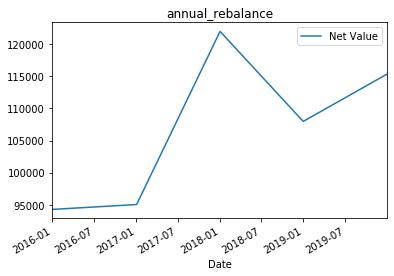

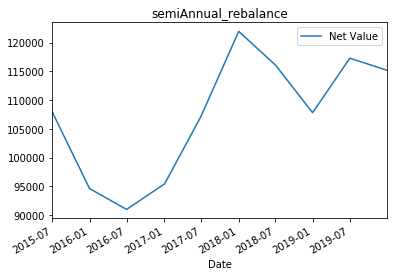

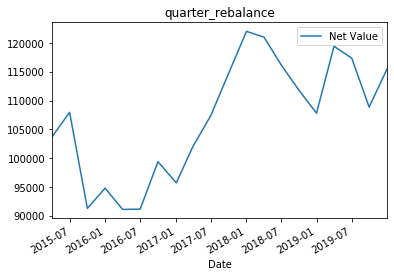

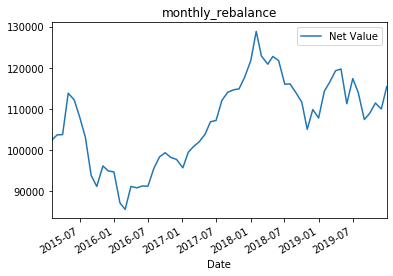

In [51]:
start_year = 2015
final_year = 2019
dateList_name = ['annual_rebalance', 'semiAnnual_rebalance', 'quarter_rebalance', 'monthly_rebalance']
for j, balance_freq_list in enumerate(
    [annual_rebalance_date, semiAnnual_rebalance_date, quarter_rebalance_date, monthly_rebalance_date]):
    
    
    final_result = []
    final_result.append({
        'Date': df_list[0]['Date'][0],
        'Record': status_list
    })

    
    prev_num_list = init_num_list
    net_value_list = []
    for year in range(start_year, final_year+1):
        for date_str in balance_freq_list:
            rebalance_date = pd.to_datetime(str(year)+'-'+date_str)

            price_list = []
            nearest_date_after = nearest(df_list[0]['Date'][df_list[0]['Date']>=rebalance_date], rebalance_date)
            for df in df_list:
                price_list.append(df.Price[df.Date==nearest_date_after].values[0])

            price_list.append(1)

            current_net_worth = sum(np.array(prev_num_list)*np.array(price_list))
            current_num_list = (current_net_worth/len(asset_list))/np.array(price_list)

            status_list = []
            for i, asset in enumerate(asset_list):
                status = {
                    'Asset': asset_list[i],
                    'Number': current_num_list[i],
                    'Price': price_list[i],
                    'Net Value': current_num_list[i]*price_list[i],
                    'Delta Number': current_num_list[i]-prev_num_list[i],
                }
                status_list.append(status)

            prev_num_list = current_num_list

            final_result.append({
                'Date': nearest_date_after,
                'Record': status_list
            })

            net_value_list.append({
                'Date': nearest_date_after,
                'Net Value': current_net_worth
            })

    pd.DataFrame(net_value_list).plot('Date', 'Net Value', title=dateList_name[j])

In [52]:
(final_result[0]['Record'][0]['Asset'], final_result[0]['Record'][0]['Net Value'])

('^GSPC', 28855.502682104234)

In [54]:
plot_dict_list = []
for record in final_result:
    plot_dict_list.append({
        'Date': record['Date'],
        'Asset Net Value': [tmp['Net Value'] for tmp in record['Record']],
    })
pd.DataFrame(plot_dict_list)

,Date,Asset Net Value
0,2015-01-02,"[28855.502682104234, 28855.502682104234, 28855..."
1,2015-02-02,"[25603.444552889592, 25603.444552889592, 25603..."
2,2015-03-02,"[25919.268419917214, 25919.268419917214, 25919..."
3,2015-03-31,"[25929.775061378532, 25929.775061378532, 25929..."
4,2015-04-30,"[28454.01817971647, 28454.01817971647, 28454.0..."
5,2015-06-01,"[28047.55255227026, 28047.55255227026, 28047.5..."
6,2015-06-30,"[27020.715279458345, 27020.715279458345, 27020..."
7,2015-07-31,"[25774.86869042589, 25774.86869042589, 25774.8..."
8,2015-08-31,"[23447.79729025107, 23447.79729025107, 23447.7..."
9,2015-09-30,"[22778.888089492255, 22778.888089492255, 22778..."


In [49]:
plot_dict_list

[{'Date': Timestamp('2015-01-02 00:00:00'),
  'Asset Net Value': [25000.0, 25000.0, 25000.0, 25000.0]},
 {'Date': Timestamp('2015-12-31 00:00:00'),
  'Asset Net Value': [23571.773840512305,
   23571.773840512305,
   23571.773840512305,
   23571.773840512305]},
 {'Date': Timestamp('2017-01-03 00:00:00'),
  'Asset Net Value': [23762.160248323133,
   23762.160248323133,
   23762.160248323133,
   23762.160248323133]},
 {'Date': Timestamp('2018-01-02 00:00:00'),
  'Asset Net Value': [30492.343408030036,
   30492.343408030036,
   30492.343408030036,
   30492.343408030036]},
 {'Date': Timestamp('2018-12-31 00:00:00'),
  'Asset Net Value': [26992.770825208943,
   26992.770825208943,
   26992.770825208943,
   26992.770825208943]},
 {'Date': Timestamp('2019-12-31 00:00:00'),
  'Asset Net Value': [28828.833326305972,
   28828.833326305972,
   28828.833326305972,
   28828.833326305976]},
 {'Date': Timestamp('2015-06-30 00:00:00'),
  'Asset Net Value': [26998.779919901222,
   26998.779919901222,
  

In [50]:
final_result

[{'Date': Timestamp('2015-01-02 00:00:00'),
  'Record': [{'Asset': '^GSPC',
    'Number': 1.0539051054073811,
    'Price': 23721.300781,
    'Net Value': 25000.0,
    'Delta Number': 1.0539051054073811},
   {'Asset': '^GDAXI',
    'Number': 1.0539051054073811,
    'Price': 23721.300781,
    'Net Value': 25000.0,
    'Delta Number': 1.0539051054073811},
   {'Asset': '^HSI',
    'Number': 1.0539051054073811,
    'Price': 23721.300781,
    'Net Value': 25000.0,
    'Delta Number': 1.0539051054073811},
   {'Asset': 'CASH',
    'Number': 25000.0,
    'Price': 1,
    'Net Value': 25000.0,
    'Delta Number': 25000.0}]},
 {'Date': Timestamp('2015-12-31 00:00:00'),
  'Record': [{'Asset': '^GSPC',
    'Number': 1.075629422660041,
    'Price': 21914.400391,
    'Net Value': 23571.773840512305,
    'Delta Number': 0.021724317252659775},
   {'Asset': '^GDAXI',
    'Number': 1.075629422660041,
    'Price': 21914.400391,
    'Net Value': 23571.773840512305,
    'Delta Number': 0.021724317252659775},